# AUTOMATED STOCK OPEN PRICE PREDICTION
### AUTHOR : Aravind Ravikumar
### DATE WRITTEN: 10-MAY-2020
### Goal: To predict Open price of Escorts Company

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../Data/STOCKS.CSV')
dfg = pd.read_csv('../Data/HangSeng.CSV')
dfy = pd.read_csv('../Data/NYSE.CSV')
dfz = pd.read_csv('../Data/Shenzhen.CSV')
dfk = pd.read_csv('../Data/KOSPI.CSV')
dfe = pd.read_csv('../Data/Euronext100.CSV')
dfx = pd.read_csv('../Data/SGXNifty.CSV')

In [3]:
dfx.head()

,Date,SGXNifty Open
0,"Jan 07, 2015","8,149.50"
1,"Jan 08, 2015","8,151.50"
2,"Jan 09, 2015","8,256.50"
3,"Jan 12, 2015","8,314.50"
4,"Jan 13, 2015","8,357.50"


## Converting to common date format

In [270]:
train['Date'] =  pd.to_datetime(train['Date'], format='%d-%m-%Y')
dfg['Date'] =  pd.to_datetime(dfg['Date'], format='%d-%m-%Y')
dfy['Date'] =  pd.to_datetime(dfy['Date'], format='%d-%m-%Y')
dfz['Date'] =  pd.to_datetime(dfz['Date'], format='%d-%m-%Y')
dfk['Date'] =  pd.to_datetime(dfk['Date'], format='%d-%m-%Y')
dfe['Date'] =  pd.to_datetime(dfe['Date'], format='%d-%m-%Y')
dfx['Date'] =  pd.to_datetime(dfx['Date'], format='%b %d, %Y')

## Merging Dataframes on the basis of date

In [271]:
train = pd.merge(train,dfg,how='inner',on='Date')
train = pd.merge(train,dfz,how='inner',on='Date')
train = pd.merge(train,dfy,how='inner',on='Date')
train = pd.merge(train,dfk,how='inner',on='Date')
train = pd.merge(train,dfe,how='inner',on='Date')
train = pd.merge(train,dfx,how='inner',on='Date')

In [272]:
train['SGXNifty Open'] = train['SGXNifty Open'].str.replace(",","").astype(float) # string to float conversion

In [273]:
train.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Infosys Adj Close,TCS Adj Close,HCL Adj Close,Wipro Adj Close,Escorts Open,Infosys Open,TCS Open,HCL Open,Wipro Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open
0,2015-01-07,8127.350098,119.312721,371.613068,1049.084839,322.932098,183.633774,120.250000,491.250000,1235.000000,384.875000,203.699997,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5
1,2015-01-08,8102.100098,118.381363,373.391449,1036.692627,315.258636,182.236313,122.099998,496.399994,1221.199951,379.250000,208.556000,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5
2,2015-01-09,8234.599609,123.626411,375.273315,1047.884155,322.553589,183.549332,127.400002,495.024994,1227.500000,384.162994,205.949997,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5
3,2015-01-12,8284.500000,123.724457,394.479614,1077.256592,324.919189,186.412491,127.099998,523.000000,1258.500000,388.774994,206.250000,24118.58984,11279.73047,10711.41016,1918.180054,824.390015,8314.5
4,2015-01-13,8323.000000,122.891121,402.371277,1076.141479,331.226013,187.271072,125.250000,526.950012,1260.000000,393.888000,208.912994,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5


In [274]:
train.shape

(1126, 18)

In [275]:
train.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Infosys Adj Close', 'TCS Adj Close', 'HCL Adj Close',
       'Wipro Adj Close', 'Escorts Open', 'Infosys Open', 'TCS Open',
       'HCL Open', 'Wipro Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open'],
      dtype='object')

In [276]:
# Rearrange columns

train = train[['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open', 'Escorts Open']]

In [277]:
train.head(2)

,Date,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,Escorts Open
0,2015-01-07,8127.350098,119.312721,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,120.250000
1,2015-01-08,8102.100098,118.381363,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,122.099998


In [278]:
train.isnull().sum()

Date                     0
NIFTY_India Adj Close    7
Escorts Adj Close        2
HangSeng Open            3
Shenzhen Open            1
NYSE Adj Close           0
KOSPI Open               5
Euronext Adj Close       1
SGXNifty Open            0
Escorts Open             0
dtype: int64

In [279]:
#Displaying rows having Null values

train[train['Escorts Adj Close'].isnull()]

,Date,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,Escorts Open
29,2015-03-02,NaN,NaN,24996.75977,11869.959960,11062.79004,1996.719971,973.010010,8895.5,135.399994
1028,2019-10-29,NaN,NaN,27027.56055,9812.480469,13186.42969,2103.919922,1099.329956,11668.0,644.000000


In [280]:
# strategies to fill null values
#train['Escorts Open'][train['Date'] == '10/25/2019'] = train['Escorts Open'][train['Date'] == '10/27/2019']
train['NIFTY_India Adj Close'].fillna(train['NIFTY_India Adj Close'].mean(),inplace=True)
train.dropna(axis=0,inplace=True)

In [281]:
train.shape

(1114, 10)

In [282]:
train.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
Escorts Adj Close        0
HangSeng Open            0
Shenzhen Open            0
NYSE Adj Close           0
KOSPI Open               0
Euronext Adj Close       0
SGXNifty Open            0
Escorts Open             0
dtype: int64

# Feature Selection Methods 
## Filter Method: Correlation Coefficient

In [283]:
train.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,Escorts Open
0,2015-01-07,8127.350098,119.312721,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,120.250000
1,2015-01-08,8102.100098,118.381363,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,122.099998
2,2015-01-09,8234.599609,123.626411,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,127.400002
3,2015-01-12,8284.500000,123.724457,24118.58984,11279.73047,10711.41016,1918.180054,824.390015,8314.5,127.099998
4,2015-01-13,8323.000000,122.891121,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,125.250000


In [284]:
cor = train.corr()
cor

,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,Escorts Open
NIFTY_India Adj Close,1.000000,0.822620,0.767842,-0.445361,0.945615,0.495648,0.843015,0.998262,0.820352
Escorts Adj Close,0.822620,1.000000,0.761214,-0.468861,0.800394,0.705350,0.669042,0.822556,0.999666
HangSeng Open,0.767842,0.761214,1.000000,-0.003758,0.831993,0.775482,0.804192,0.768081,0.762718
Shenzhen Open,-0.445361,-0.468861,-0.003758,1.000000,-0.296857,-0.017343,-0.077722,-0.449134,-0.467761
NYSE Adj Close,0.945615,0.800394,0.831993,-0.296857,1.000000,0.623508,0.920624,0.946827,0.799881
KOSPI Open,0.495648,0.705350,0.775482,-0.017343,0.623508,1.000000,0.624415,0.497371,0.711246
Euronext Adj Close,0.843015,0.669042,0.804192,-0.077722,0.920624,0.624415,1.000000,0.843444,0.669277
SGXNifty Open,0.998262,0.822556,0.768081,-0.449134,0.946827,0.497371,0.843444,1.000000,0.820522
Escorts Open,0.820352,0.999666,0.762718,-0.467761,0.799881,0.711246,0.669277,0.820522,1.000000


In [285]:
cor.index[abs(cor['Escorts Open']) > .6]

Index(['NIFTY_India Adj Close', 'Escorts Adj Close', 'HangSeng Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'Escorts Open'],
      dtype='object')

## Wrapper Method: Step forward feature selection

In [86]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [87]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(LinearRegression(), 
           k_features=5, 
           forward=True, 
           floating=False,
           scoring='neg_mean_squared_error',
           cv=5)

# fit the object to the training data.
sfs = sfs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['NIFTY_India Adj Close', 'Escorts Adj Close', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open'],
      dtype='object')


## Finding Independent Features

In [88]:
train2 = train[['NIFTY_India Adj Close', 'Escorts Adj Close', 'HangSeng Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open']]

In [89]:
train2.head(2)

,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open
0,8127.350098,119.312721,23396.69922,10514.87012,1878.900024,805.469971,8149.5
1,8102.100098,118.381363,23920.34961,10627.12988,1895.849976,810.940002,8151.5


In [90]:
cor2 = train2.corr()
cor2

,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open
NIFTY_India Adj Close,1.000000,0.822620,0.767842,0.945615,0.495648,0.843015,0.998262
Escorts Adj Close,0.822620,1.000000,0.761214,0.800394,0.705350,0.669042,0.822556
HangSeng Open,0.767842,0.761214,1.000000,0.831993,0.775482,0.804192,0.768081
NYSE Adj Close,0.945615,0.800394,0.831993,1.000000,0.623508,0.920624,0.946827
KOSPI Open,0.495648,0.705350,0.775482,0.623508,1.000000,0.624415,0.497371
Euronext Adj Close,0.843015,0.669042,0.804192,0.920624,0.624415,1.000000,0.843444
SGXNifty Open,0.998262,0.822556,0.768081,0.946827,0.497371,0.843444,1.000000


In [91]:
cor2.shape

(7, 7)

In [92]:
columns = np.full((cor2.shape[0],), True, dtype=bool)
for i in range(cor2.shape[0]):
    for j in range(i+1, cor2.shape[0]):
        if cor2.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j]=False

## It shows that Singapore Nifty Open and Indian Nifty Close are highly correlated. Similarly, NYSE Close and Euronext Close are correlated with each other and also to Indian Nifty Close.

In [93]:
selected = train2.columns[columns]
selected

Index(['NIFTY_India Adj Close', 'Escorts Adj Close', 'HangSeng Open',
       'KOSPI Open'],
      dtype='object')

## Normalization

In [29]:
#X = train[train.columns[0:-1]]
# Y = train[train.columns[-1]]


In [30]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_tr = scaler.transform(X_train)
# X_te = scaler.transform(X_test)    
# #Converting n-d array to dataframe
# X_train = pd.DataFrame(X_tr, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])
# X_test = pd.DataFrame(X_te, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])

## Feature Selection using Ensemble Random Forest

In [286]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]


In [315]:
model = RandomForestRegressor(max_depth=8, n_estimators=60)

In [316]:
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [317]:
labels = list(X.columns)[0:-1]

In [318]:
for feature in zip(labels, model.feature_importances_):
    print(feature)

('NIFTY_India Adj Close', 5.929665193643716e-05)
('Escorts Adj Close', 0.9995198299907843)
('HangSeng Open', 6.458449145648737e-05)
('Shenzhen Open', 2.8658493807181054e-05)
('NYSE Adj Close', 0.00011671575745054502)
('KOSPI Open', 8.356505868248933e-05)
('Euronext Adj Close', 7.060378561076519e-05)


In [55]:
sfm = SelectFromModel(model, threshold=0.0001)
sfm.fit(X,Y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                                criterion='mse', max_depth=12,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=2,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=90, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_

In [56]:
for index in sfm.get_support(indices=True):
    print(labels[index])

Escorts Adj Close
KOSPI Open


In [ ]:
# X_train_imp = sfm.transform(X)
# X_test_imp = sfm.transform(X_test)

## Since all features are numerical, we give importance to correlation feature selection.
## Link: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

## Selecting Features

In [96]:
#Dont forget to add target column
train = train[['NIFTY_India Adj Close',
               'Escorts Adj Close', 
               'HangSeng Open',
               'KOSPI Open',
               'Escorts Open']]
train.head(2)

,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open,Escorts Open
0,8127.350098,119.312721,23396.69922,1878.900024,120.250000
1,8102.100098,118.381363,23920.34961,1895.849976,122.099998


# Handle outliers using IQR

In [97]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NIFTY_India Adj Close    2477.925052
Escorts Adj Close         527.678681
HangSeng Open            5068.729980
KOSPI Open                277.484924
Escorts Open              530.975010
dtype: float64


In [98]:
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(1111, 5)

In [108]:
train.head(2)

,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open,Escorts Open
0,8127.350098,119.312721,23396.69922,1878.900024,120.250000
1,8102.100098,118.381363,23920.34961,1895.849976,122.099998


## Test Data

In [99]:
test = pd.read_csv('../Data/STOCKS_test.CSV')
dfgt = pd.read_csv('../Data/HangSeng_test.CSV')
dfkt = pd.read_csv('../Data/KOSPI_test.CSV')

In [100]:
#Converting to common date format

test['Date'] =  pd.to_datetime(test['Date'], format='%d-%m-%Y')
dfgt['Date'] =  pd.to_datetime(dfgt['Date'], format='%d-%m-%Y')
dfkt['Date'] =  pd.to_datetime(dfkt['Date'], format='%d-%m-%Y')

In [101]:
#Merging Dataframes based on date

test = pd.merge(test,dfgt,how='inner',on='Date')
test = pd.merge(test,dfkt,how='inner',on='Date')

In [102]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Infosys Adj Close,TCS Adj Close,HCL Adj Close,Wipro Adj Close,Escorts Open,Infosys Open,TCS Open,HCL Open,Wipro Open,HangSeng Open,KOSPI Open
0,2020-04-08,8792.200195,663.750000,630.418579,1769.997070,451.149994,191.899994,653.700012,630.000000,1760.000000,451.000000,191.500000,24191.32031,1815.750000
1,2020-04-09,8748.750000,642.349976,623.117920,1700.451538,463.100006,192.899994,661.000000,646.799988,1750.449951,480.700012,198.399994,24181.32031,1838.089966
2,2020-04-16,8925.299805,714.700012,630.467896,1730.064453,478.750000,186.550003,710.000000,619.950012,1709.949951,473.000000,180.000000,24025.44922,1839.510010
3,2020-04-17,8992.799805,714.299988,615.471985,1711.020508,459.750000,187.850006,744.000000,644.000000,1800.000000,470.000000,192.500000,24457.83008,1893.310059
4,2020-04-20,9266.750000,746.200012,620.306213,1800.906250,455.250000,187.000000,749.450012,640.000000,1830.000000,458.000000,189.000000,24503.56055,1908.339966


In [103]:
test.shape

(29, 14)

In [104]:
test.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Infosys Adj Close', 'TCS Adj Close', 'HCL Adj Close',
       'Wipro Adj Close', 'Escorts Open', 'Infosys Open', 'TCS Open',
       'HCL Open', 'Wipro Open', 'HangSeng Open', 'KOSPI Open'],
      dtype='object')

In [105]:
# Rearrange columns

test = test[['Date', 
             'NIFTY_India Adj Close',
             'Escorts Adj Close',
             'HangSeng Open',
             'KOSPI Open',
             'Escorts Open']]

In [106]:
test.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
Escorts Adj Close        0
HangSeng Open            0
KOSPI Open               0
Escorts Open             0
dtype: int64

## Apply Machine Learning Models

In [109]:
X = train[train.columns[0:-1]]
Y = train[train.columns[-1]]

In [110]:
X_test = test[test.columns[1:-1]]

In [111]:
test.rename(columns = {'Escorts Open':'Actual Open'}, inplace=True)

In [112]:
type(X_test)

pandas.core.frame.DataFrame

## 1. Linear Regression Model

In [113]:
X.head()

,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open
0,8127.350098,119.312721,23396.69922,1878.900024
1,8102.100098,118.381363,23920.34961,1895.849976
2,8234.599609,123.626411,24049.69922,1919.800049
3,8284.500000,123.724457,24118.58984,1918.180054
4,8323.000000,122.891121,23908.23047,1915.030029


In [114]:
model_linear = LinearRegression()

In [115]:
model_linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
model_linear.coef_

array([-1.03791638e-04,  9.96872322e-01, -3.15206115e-04,  1.99434938e-02])

In [117]:
X_test.head()

,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open
0,8792.200195,663.750000,24191.32031,1815.750000
1,8748.750000,642.349976,24181.32031,1838.089966
2,8925.299805,714.700012,24025.44922,1839.510010
3,8992.799805,714.299988,24457.83008,1893.310059
4,9266.750000,746.200012,24503.56055,1908.339966


In [118]:
test['LR Predicted Open'] = model_linear.predict(X_test)

In [119]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open,Actual Open,LR Predicted Open
0,2020-04-08,8792.200195,663.750000,24191.32031,1815.750000,653.700012,660.918381
1,2020-04-09,8748.750000,642.349976,24181.32031,1838.089966,661.000000,640.038488
2,2020-04-16,8925.299805,714.700012,24025.44922,1839.510010,710.000000,712.221364
3,2020-04-17,8992.799805,714.299988,24457.83008,1893.310059,744.000000,712.752257
4,2020-04-20,9266.750000,746.200012,24503.56055,1908.339966,749.450012,744.809409


In [120]:
model_linear.score(X_test, test['Actual Open'])

0.9694911803380363

In [121]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['LR Predicted Open'])

139.72525878330097

## 2. Support Vector Regression

In [122]:
model_svr = SVR()

In [123]:
hyperparameter_grid = {'kernel':['rbf', 'linear'],
                       'C':[.01, .1, 1, 10, 50, 100],
                       'tol': [1e-4, 1e-3]
                      }
                       
grid_cv = GridSearchCV(estimator=model_svr,
            param_grid=hyperparameter_grid,
            cv=5,
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [124]:
grid_cv.fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'kernel': ['rbf', 'linear'], 'tol': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [125]:
grid_cv.best_estimator_

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [132]:
model_svr = SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [133]:
model_svr.fit(X,Y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [134]:
test['SVR Predicted Open'] = model_svr.predict(X_test)

In [135]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open,Actual Open,LR Predicted Open,SVR Predicted Open
0,2020-04-08,8792.200195,663.750000,24191.32031,1815.750000,653.700012,660.918381,665.293591
1,2020-04-09,8748.750000,642.349976,24181.32031,1838.089966,661.000000,640.038488,644.117885
2,2020-04-16,8925.299805,714.700012,24025.44922,1839.510010,710.000000,712.221364,716.467650
3,2020-04-17,8992.799805,714.299988,24457.83008,1893.310059,744.000000,712.752257,716.546609
4,2020-04-20,9266.750000,746.200012,24503.56055,1908.339966,749.450012,744.809409,748.464695


In [136]:
#test.drop('Predicted Open',axis=1)

In [137]:
model_svr.score(X_test, test['Actual Open'])

0.9716345158823855

In [138]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['SVR Predicted Open'])

129.9091427581044

## 3. Random Forest Regressor

In [139]:
model_rf = RandomForestRegressor()

In [140]:
hyperparameter_grid = {'n_estimators':[ _ for _ in range(20,150,10)],
                       'max_depth':[_ for _ in range(4,20,2)],
                       'max_features': ['sqrt','auto'],
                       'min_samples_leaf': [1,2,3],
                       'bootstrap':[True, False] }


grid_cv = GridSearchCV(estimator=model_rf,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [141]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 1248 candidates, totalling 6240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2456 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2996 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3608 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4292 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 5048 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5607 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6057 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 6240 out of 6240 | elapsed:  5.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [142]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [149]:
model_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [155]:
model_rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [156]:
test['Random Forest Predicted Open'] = model_rf.predict(X_test)

In [157]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open
0,2020-04-08,8792.200195,663.750000,24191.32031,1815.750000,653.700012,660.918381,665.293591,654.433729
1,2020-04-09,8748.750000,642.349976,24181.32031,1838.089966,661.000000,640.038488,644.117885,643.040534
2,2020-04-16,8925.299805,714.700012,24025.44922,1839.510010,710.000000,712.221364,716.467650,721.860087
3,2020-04-17,8992.799805,714.299988,24457.83008,1893.310059,744.000000,712.752257,716.546609,721.860087
4,2020-04-20,9266.750000,746.200012,24503.56055,1908.339966,749.450012,744.809409,748.464695,738.980109


In [158]:
model_rf.score(X_test, test['Actual Open'])

0.9715527178851832

In [159]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['Random Forest Predicted Open'])

130.2837638169879

## 4. XGBoost Regressor

In [194]:
model_xg = xgb.XGBRegressor()

In [195]:
hyperparameter_grid = {  
    "n_estimators": [_ for _ in range(20,200,20)],
    "max_depth": [_ for _ in range(2,14,2)],
    "learning_rate": [0.01, 0.1, 0.3, 0.5],
    "colsample_bytree": [0.4, 0.6, 0.8, 1.0],
    'colsample_bylevel': [0.4, 0.6, 0.8, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    "subsample": [0.5, 0.7, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    
    
}
                       

random_cv = RandomizedSearchCV(estimator=model_xg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [196]:
random_cv.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                   

In [197]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=7.0, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [201]:
model_xg = xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=7.0, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [202]:
model_xg.fit(X,Y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=7.0, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [203]:
X_test.head()

,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open
0,8792.200195,663.750000,24191.32031,1815.750000
1,8748.750000,642.349976,24181.32031,1838.089966
2,8925.299805,714.700012,24025.44922,1839.510010
3,8992.799805,714.299988,24457.83008,1893.310059
4,9266.750000,746.200012,24503.56055,1908.339966


In [204]:
test['XGBoost Predicted Open'] = model_xg.predict(X_test)

In [205]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open
0,2020-04-08,8792.200195,663.750000,24191.32031,1815.750000,653.700012,660.918381,665.293591,654.433729,656.520203
1,2020-04-09,8748.750000,642.349976,24181.32031,1838.089966,661.000000,640.038488,644.117885,643.040534,644.240479
2,2020-04-16,8925.299805,714.700012,24025.44922,1839.510010,710.000000,712.221364,716.467650,721.860087,699.867676
3,2020-04-17,8992.799805,714.299988,24457.83008,1893.310059,744.000000,712.752257,716.546609,721.860087,710.654358
4,2020-04-20,9266.750000,746.200012,24503.56055,1908.339966,749.450012,744.809409,748.464695,738.980109,733.424805


In [206]:
model_xg.score(X_test, test['Actual Open'])

0.9587168152333455

In [207]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['XGBoost Predicted Open'])

189.07003741318653

## 5. AdaBoost Regressor

In [235]:
model_ada = AdaBoostRegressor()

In [236]:
hyperparameter_grid = {'n_estimators':[20, 40, 50, 60, 80, 100, 200, 400, 1000],
                       'learning_rate':[0.1, 0.3, 0.5],
                       'loss': ['linear','square'] }


grid_cv = GridSearchCV(estimator=model_ada,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [251]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 159 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   25.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [20, 40, 50, 60, 80, 100, 200, 400,
                                          1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [252]:
grid_cv.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=80, random_state=None)

In [253]:
model_ada = AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=80, random_state=None)

In [254]:
model_ada.fit(X,Y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=80, random_state=None)

In [255]:
test['AdaBoost Predicted Open'] = model_ada.predict(X_test)

In [256]:
test.head(5)

,Date,NIFTY_India Adj Close,Escorts Adj Close,HangSeng Open,KOSPI Open,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open,AdaBoost Predicted Open
0,2020-04-08,8792.200195,663.750000,24191.32031,1815.750000,653.700012,660.918381,665.293591,654.433729,656.520203,646.362651
1,2020-04-09,8748.750000,642.349976,24181.32031,1838.089966,661.000000,640.038488,644.117885,643.040534,644.240479,644.607728
2,2020-04-16,8925.299805,714.700012,24025.44922,1839.510010,710.000000,712.221364,716.467650,721.860087,699.867676,719.545725
3,2020-04-17,8992.799805,714.299988,24457.83008,1893.310059,744.000000,712.752257,716.546609,721.860087,710.654358,719.545725
4,2020-04-20,9266.750000,746.200012,24503.56055,1908.339966,749.450012,744.809409,748.464695,738.980109,733.424805,726.311423


In [257]:
model_ada.score(X_test, test['Actual Open'])

0.9562372868253239

In [258]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['AdaBoost Predicted Open'])

200.42586016575544

# Results

|Model | Score | 
| --- | --- | 
| Linear Regression| .9694 |
| Support Vector Regression | .9716 |
| Random Forest Regressor | .9715 |  
| XGBoost Regressor | .9587 | 
| AdaBoost Regressor | .9562 | 


# SVR model is selected for Stock Open Price prediction.

In [259]:
test.set_index('Date',inplace=True)

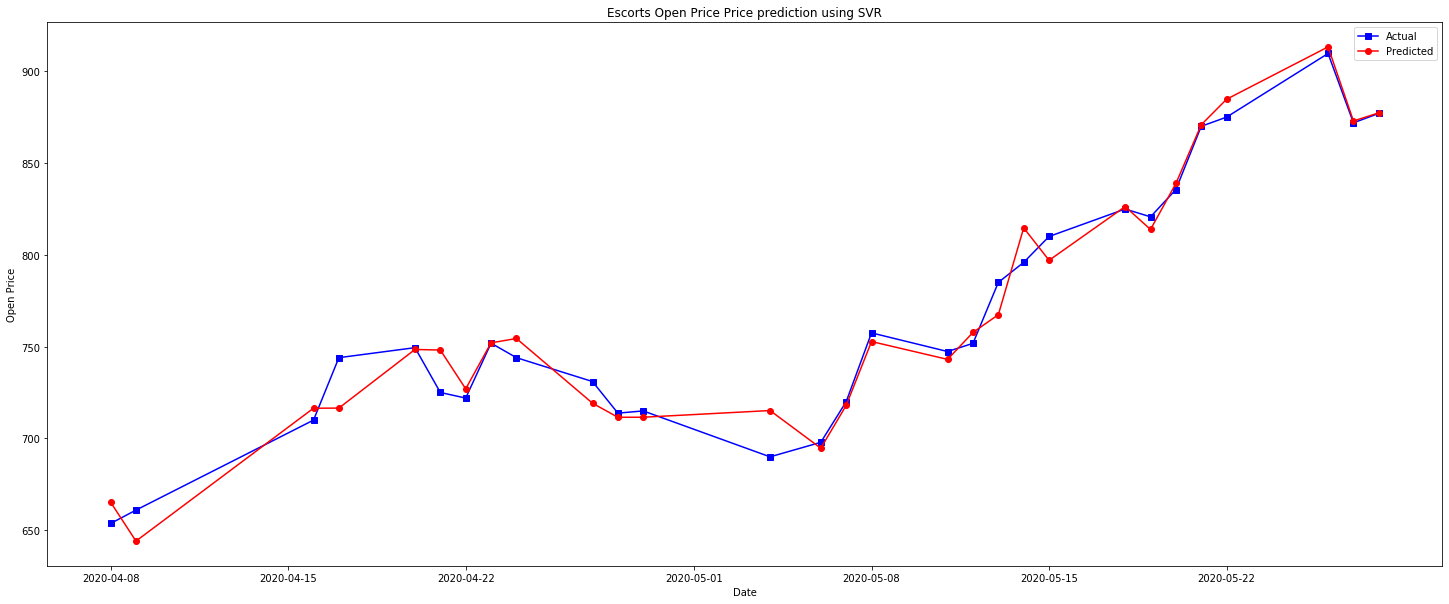

In [260]:
plt.figure(figsize = (25, 10))

plt.plot(test['Actual Open'], 'bs-', label = 'Actual')
plt.plot(test['SVR Predicted Open'], 'ro-', label = 'Predicted')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price")

plt.title('Escorts Open Price Price prediction using SVR')
plt.show()

In [261]:
from joblib import dump, load
dump(model_svr, 'escorts_SVR.joblib')

['escorts_SVR.joblib']